# Exploratory Data Analysis

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
cities = pd.read_csv('Nomad.csv')
cities.drop(columns='Unnamed: 0', inplace=True)
cities['Cost'] = cities['Cost'].str.replace(',','')
cities['Cost'] = cities.Cost.astype(int)
cities['Income_Level'] = cities['Income_Level'].str.replace(',','')
cities['Income_Level'] = cities.Income_Level.astype(int)

There are a ton of variables describing each city in the dataset, take a glance below. No need to comb through them all, we'll plot the most important ones for you.

In [27]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Total_Score                             499 non-null    float64
 1   Liked_By_Members                        148 non-null    float64
 2   Quality_Of_Life_Score                   499 non-null    object 
 3   Family_Score                            499 non-null    object 
 4   Community_Score                         499 non-null    object 
 5   Cost                                    499 non-null    int32  
 6   Internet                                499 non-null    int64  
 7   Fun                                     497 non-null    object 
 8   Humidity_now                            499 non-null    int64  
 9   Air_Quality_Now                         186 non-null    float64
 10  Air_Quality_Annual                      378 non-null    float6

In [28]:
# Take a look at the top 10 cities
top10cities = cities.iloc[:10].copy()
top10cities[['Rank', 'City', 'Total_Score']]

,Rank,City,Total_Score
0,1,bangkok,4.87
1,2,tokyo,4.59
2,3,buenos-aires,4.49
3,4,mexico-city,4.48
4,5,chiang-mai,4.29
5,6,kuala-lumpur,4.29
6,7,seoul,4.24
7,8,athens,4.24
8,9,ko-pha-ngan,4.14
9,10,penang,4.09


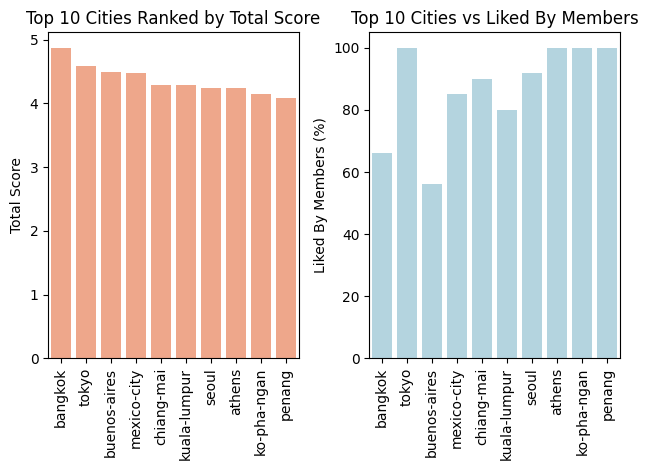

In [29]:
plt.subplot(1, 2, 1)
sns.barplot(data=top10cities, x='City', y='Total_Score', color='lightsalmon')
plt.title('Top 10 Cities Ranked by Total Score')
plt.xlabel(None)
plt.ylabel('Total Score')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=top10cities, x='City', y='Liked_By_Members', color='lightblue')
plt.title('Top 10 Cities vs Liked By Members')
plt.xlabel(None)
plt.ylabel('Liked By Members (%)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('Top-10-Cities.png')
plt.show()

The first thing we notice is that the top 10 cities vary quite a bit in the 'Liked by Members' variable, which measures the percent of Nomad List members that liked the city when they visited it. What we find when modeling this data is that this variable, 'Liked by Members' is the best predictor (by a large margin) for 'Total Score' and therefore 'Rank'. Yet in the plot, it doesn't appear to be very informative.

## Plots for TOTAL SCORE

The plots for Total Score will give us a sense of which variables might be more important for modeling the ranking algorithm of Nomad List. Which variables are most strongly associated with 'Total Score'?

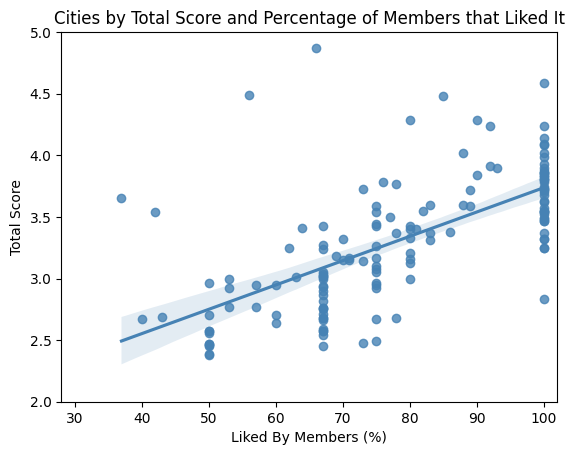

In [30]:
sns.regplot(data=cities, x='Liked_By_Members', y='Total_Score', color='steelblue')
plt.title('Cities by Total Score and Percentage of Members that Liked It')
plt.xlabel('Liked By Members (%)')
plt.ylabel('Total Score')
plt.ylim(2, 5)
plt.xlim(28, 102)
plt.show()

Liked by members is the best predictor of total score, and it has a strong positive correlation.

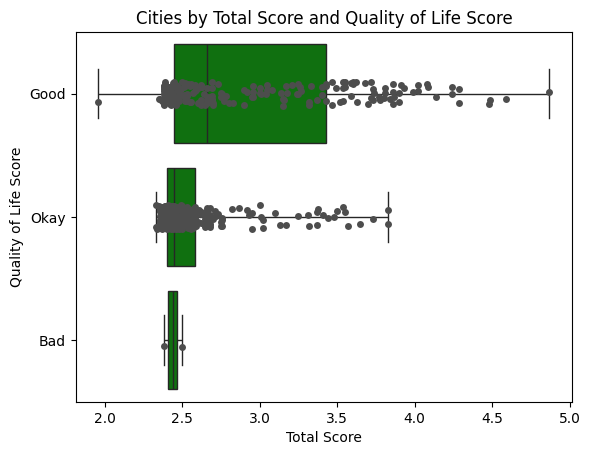

In [31]:
sns.boxplot(cities, x='Total_Score', y='Quality_Of_Life_Score', whis=[0, 100], color='green')
sns.stripplot(cities, x='Total_Score', y='Quality_Of_Life_Score', size=5, color='.3')
plt.title('Cities by Total Score and Quality of Life Score')
plt.xlabel('Total Score')
plt.ylabel('Quality of Life Score')
plt.show()

Interesting - no cities with 'Okay' quality of life score have above a 4 in 'Total Score'. Seems like a 'Good' quality of life is necessary, but not sufficient, for a high 'Total Score'.

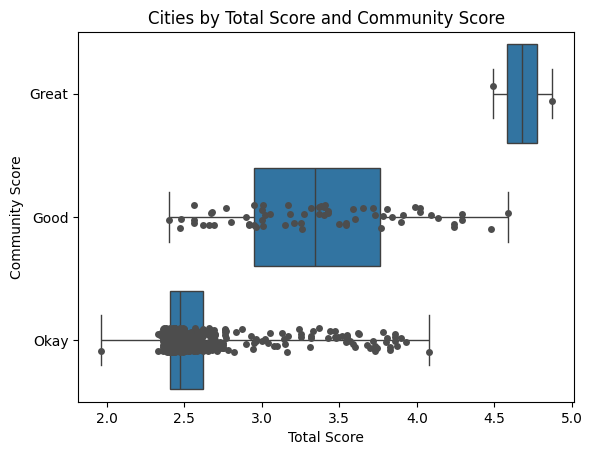

In [32]:
sns.boxplot(cities, x='Total_Score', y='Community_Score', whis=[0, 100])
sns.stripplot(cities, x='Total_Score', y='Community_Score', size=5, color='.3')
plt.title('Cities by Total Score and Community Score')
plt.xlabel('Total Score')
plt.ylabel('Community Score')
plt.show()

It looks like community is important for Nomad List's city ranking, and the bar is high. Only 2 cities (of 500) are rated as 'Great' and these two cities are among the highest rated in terms of total score.

## Plots for LIKED BY MEMBERS

The plots for 'Liked by Members' will help us understand which factors are the most important for the digital nomads! If a higher percentage of members liked a city, that's a great indicator of what they care about.

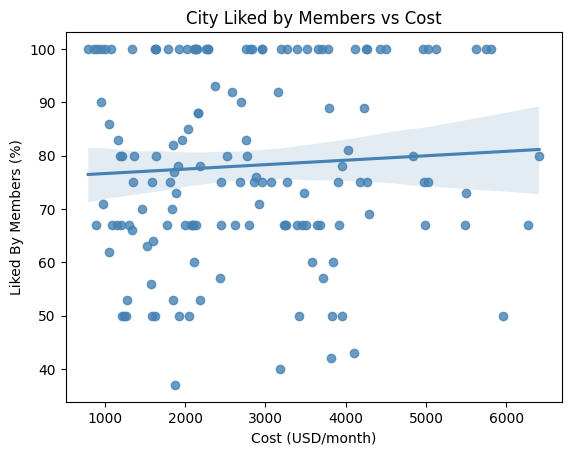

In [33]:
sns.regplot(data=cities, x='Cost', y='Liked_By_Members', color='steelblue')
plt.title('City Liked by Members vs Cost')
plt.xlabel('Cost (USD/month)')
plt.ylabel('Liked By Members (%)')
plt.show()

Cost seems to have very little correlation with whether the city was liked by members, which is interesting to see. You'd assume that cost is a major deciding factor for digital nomads. But maybe we're seeing this in our data because only the nomads that can afford living in expensive city do so, and therefore high cost isn't as much of a hurdle for liking a place.

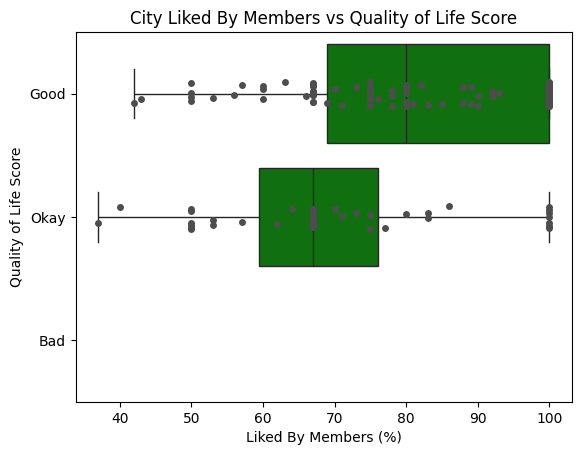

In [34]:
sns.boxplot(cities, x='Liked_By_Members', y='Quality_Of_Life_Score', whis=[0, 100], color='green')
sns.stripplot(cities, x='Liked_By_Members', y='Quality_Of_Life_Score', size=5, color='.3')
plt.title('City Liked By Members vs Quality of Life Score')
plt.xlabel('Liked By Members (%)')
plt.ylabel('Quality of Life Score')
plt.show()

Nomad List members tend to like cities with a higher quality of life, as anticipated. Unfortunately, no members even left a 'Liked?Disliked' rating for cities with a 'Bad' quality of life, so we don't even have data for that group. 

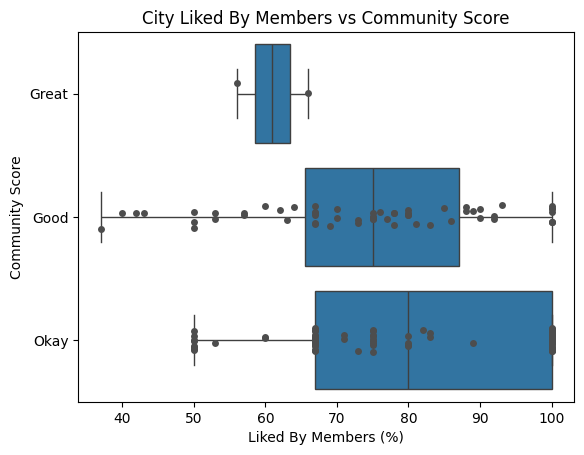

In [35]:
sns.boxplot(cities, x='Liked_By_Members', y='Community_Score', whis=[0, 100])
sns.stripplot(cities, x='Liked_By_Members', y='Community_Score', size=5, color='.3')
plt.title('City Liked By Members vs Community Score')
plt.xlabel('Liked By Members (%)')
plt.ylabel('Community Score')
plt.show()

At first glance this plot is the opposite of what you'd expect!

In [36]:
plot_order = ['Great', 'Good', 'Okay']
cities.groupby('Community_Score')['Liked_By_Members'].mean().reindex(plot_order)

Community_Score
Great    61.000000
Good     74.186441
Okay     81.149425
Name: Liked_By_Members, dtype: float64

Community score rates the liveliness of the remote worker and nomad community there. Indeed, cities with a higher community score tend to be less liked by Nomad List members. The 'Great' group only has two cities in it, so maybe those two cities just aren't liked by members for some other reason. But overall, it seems like people don't necessarily want too huge of a digital nomad commmunity at their city.

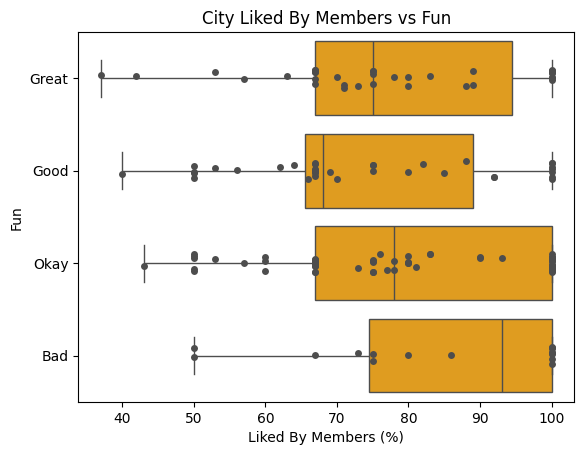

In [37]:
plot_order = ['Great', 'Good', 'Okay', 'Bad']
sns.boxplot(cities, x='Liked_By_Members', y='Fun', whis=[0, 100], color='orange', order=plot_order)
sns.stripplot(cities, x='Liked_By_Members', y='Fun', size=5, color='.3', order=plot_order)
plt.title('City Liked By Members vs Fun')
plt.xlabel('Liked By Members (%)')
plt.ylabel('Fun')
plt.show()

In [38]:
cities.groupby('Fun')['Liked_By_Members'].mean().reindex(plot_order)

Fun
Great    77.885714
Good     73.888889
Okay     78.967213
Bad      84.750000
Name: Liked_By_Members, dtype: float64

Again, not what you'd expect. The cities that are the 'least fun' according to this score, are the most liked by members. Nomad List doesn't provide a definiton of this variable, so we can't draw too many conclusions here. Maybe there's a confounder causing cities that tend to be more fun also be less liked - not sure.

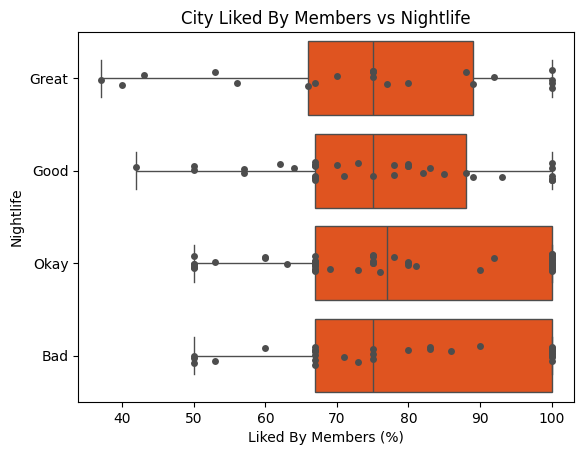

In [39]:
sns.boxplot(cities, x='Liked_By_Members', y='Nightlife', whis=[0, 100], color='orangered', order=plot_order)
sns.stripplot(cities, x='Liked_By_Members', y='Nightlife', size=5, color='.3', order=plot_order)
plt.title('City Liked By Members vs Nightlife')
plt.xlabel('Liked By Members (%)')
plt.ylabel('Nightlife')
plt.show()

In [40]:
cities.groupby('Nightlife')['Liked_By_Members'].mean().reindex(plot_order)

Nightlife
Great    74.190476
Good     76.297297
Okay     80.258621
Bad      78.843750
Name: Liked_By_Members, dtype: float64

Nomads don't seem to care too much about nightlife - in fact there's a slight inverse correlation.

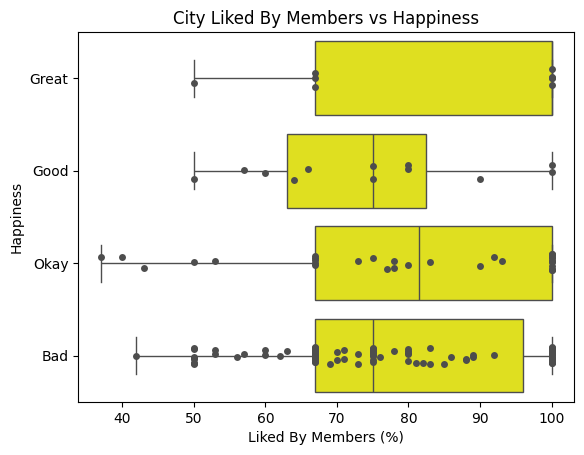

In [41]:
sns.boxplot(cities, x='Liked_By_Members', y='Happiness', whis=[0, 100], color='yellow', order=plot_order)
sns.stripplot(cities, x='Liked_By_Members', y='Happiness', size=5, color='.3', order=plot_order)
plt.title('City Liked By Members vs Happiness')
plt.xlabel('Liked By Members (%)')
plt.ylabel('Happiness')
plt.show()

In [42]:
cities.groupby('Happiness')['Liked_By_Members'].mean().reindex(plot_order)

Happiness
Great    83.444444
Good     74.750000
Okay     80.531250
Bad      77.200000
Name: Liked_By_Members, dtype: float64

No striking trend between happiness of the place (country that the city is in) and whether nomads liked it.

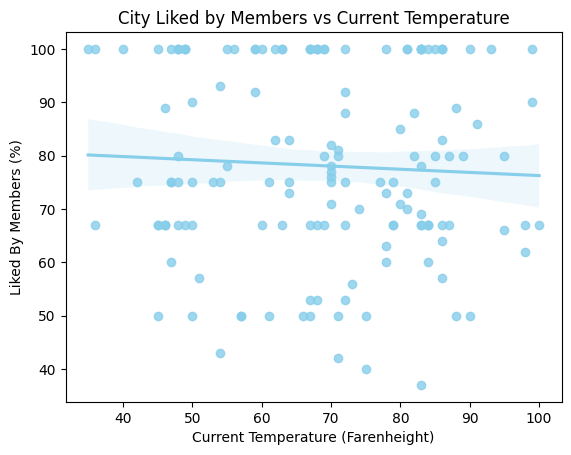

In [43]:
sns.regplot(data=cities, x='Temperature_now_Farenheight', y='Liked_By_Members', color='skyblue')
plt.title('City Liked by Members vs Current Temperature')
plt.xlabel('Current Temperature (Farenheight)')
plt.ylabel('Liked By Members (%)')
plt.show()

There seems to be no correlation between current temperature and whether a city is liked. Contrary to popular beleif, digital nomads don't mind the breeze. To be fair, none of the cities are really, really cold though.

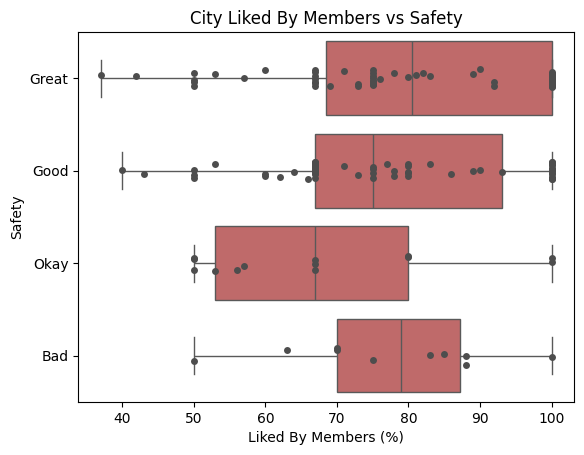

In [44]:
sns.boxplot(cities, x='Liked_By_Members', y='Safety', whis=[0, 100], color='indianred', order=plot_order)
sns.stripplot(cities, x='Liked_By_Members', y='Safety', size=5, color='.3', order=plot_order)
plt.title('City Liked By Members vs Safety')
plt.xlabel('Liked By Members (%)')
plt.ylabel('Safety')
plt.show()

In [45]:
cities.groupby('Safety')['Liked_By_Members'].mean().reindex(plot_order)

Safety
Great    81.593750
Good     76.852459
Okay     67.461538
Bad      77.200000
Name: Liked_By_Members, dtype: float64

Digital nomads have a minimal preference for cities that are safer. At the same time, there are still a handful of cities that are rated 'Bad' for safety but are still liked by a majority of members that visit.

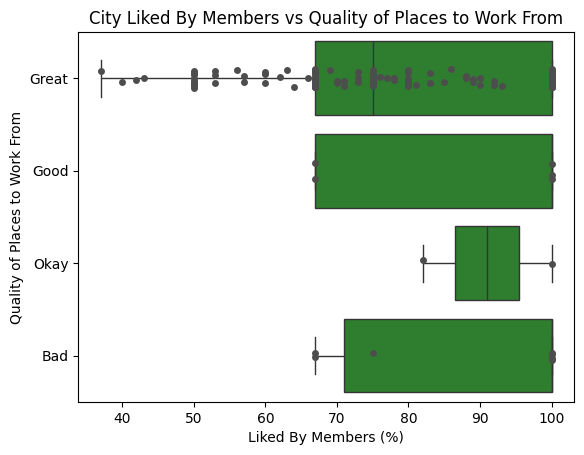

In [46]:
sns.boxplot(cities, x='Liked_By_Members', y='Places_To_Work_From', whis=[0, 100], color='forestgreen', order=plot_order)
sns.stripplot(cities, x='Liked_By_Members', y='Places_To_Work_From', size=5, color='.3', order=plot_order)
plt.title('City Liked By Members vs Quality of Places to Work From')
plt.xlabel('Liked By Members (%)')
plt.ylabel('Quality of Places to Work From')
plt.show()

There are so few data points in the 'Bad', 'Okay', and 'Good' group that I'm hesitant to interpret this. The only meaningful thing to learn is that a majority of the cities have great places to work from!

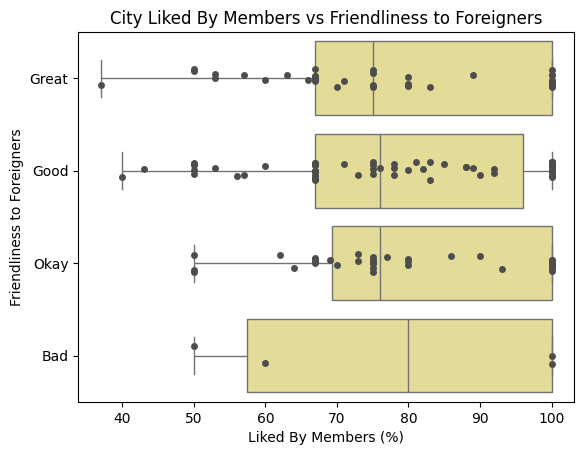

In [47]:
sns.boxplot(cities, x='Liked_By_Members', y='Friendly_To_Foreigners', whis=[0, 100], color='khaki', order=plot_order)
sns.stripplot(cities, x='Liked_By_Members', y='Friendly_To_Foreigners', size=5, color='.3', order=plot_order)
plt.title('City Liked By Members vs Friendliness to Foreigners')
plt.xlabel('Liked By Members (%)')
plt.ylabel('Friendliness to Foreigners')
plt.show()

In [48]:
cities.groupby('Friendly_To_Foreigners')['Liked_By_Members'].mean().reindex(plot_order)

Friendly_To_Foreigners
Great    76.692308
Good     77.523810
Okay     80.657895
Bad      77.500000
Name: Liked_By_Members, dtype: float64

Whether the locals are friendly to digital nomads doesn't seem to affect whether they like a city.

Overall, we identified a few variables that will be important for modeling the Nomad List ranking algorithm. But more importantly, we uncovered some obvious and not so obvious trends about what digital nomads like in a city. The one takeaway is this: there's no one magic variable that makes a city great for digital nomads. Whatever you read online about cost, quality of life, temperature, etc., take with a grain of salt. None of the variables showed a super strong relationship with whether it was liked by nomads.